# I. Economic Inequality

Excessive economic inequality is generally considered to negatively impact countries that experience it, from [reinforcing and exacerbating racial inequalities](https://inequality.org/facts/racial-inequality/) to [potentially destabilizing national economies](https://stonecenter.gc.cuny.edu/keynote-lecture-inequality-and-crises-coincidence-or-causation/) and even [enabling outright subversions of democracy](https://www.penguinrandomhouse.com/books/215462/dark-money-by-jane-mayer/). With such purported negative consequences, I expect that I should be able to observe a negative correlation between national economic inequality and democratic flourishing.

# II. Building the Dataset

In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from DemocracyInequalityFunctions import *

## Load Freedom Data (Freedom in the World)

To measure freedom and democratic flourishing in a broad sense, I used a dataset compiled by [Freedom House](https://freedomhouse.org/), an independent watchdog organization that annually monitors the status of political rights and civil liberties in every nation around the world.

In [3]:
pwd = os.getcwd()

In [4]:
fiw_ffile = pwd + '\\' + 'RawData' + '\\' + 'FreedomHouse_FreedomInTheWorld' + '\\' + 'All_data_FIW_2013-2021.xlsx'
fiw_df = pd.read_excel(fiw_ffile,1,header=1)
fiw_df_2021 = fiw_df[fiw_df['Edition']==2021]

## Load Economic Data (World Inequality Database)

The economic data that focuses on income and wealth inequality around the world, the [World Inequality Database](https://wid.world/data/) (WID), was compiled by a international group of academic economists.

In [5]:
wid_countries_ffile = pwd + '\\' + 'RawData' + '\\' + 'WorldInequalityDatabase' + '\\' + 'WID_countries.csv'
wid_df = pd.read_csv(wid_countries_ffile, sep = ';')

## Create List of Countries

In [6]:
country_names_list = match_wid_and_fiw_data(wid_df,fiw_df_2021)
country_names_list = add_countries_with_mismatched_names(country_names_list)
country_names_list = clean_up_country_list(country_names_list)

## Create Main Dataframe

In [7]:
df1 = pd.DataFrame()
for i in range(0,len(country_names_list)):
    df_row = fiw_df_2021.loc[fiw_df_2021['Country/Territory'] == country_names_list[i].fiw_name]
    freedom_score = df_row['Total'].values[0]
    political_rights_score = df_row['PR'].values[0]
    civil_liberties_score = df_row['CL'].values[0]
    fiw_values = [freedom_score,political_rights_score,civil_liberties_score]
    fiw_columns = ['Freedom Score', 'Political Rights Score', 'Civil Liberties Score']
    
    wid_code = country_names_list[i].wid_code
    fiw_name = country_names_list[i].fiw_name
    #print(wid_code)
    wid_country_ffile = pwd + '\\' + 'RawData' + '\\' + 'WorldInequalityDatabase' + '\\' + 'WID_data_' + wid_code + '.csv'
    wid_df = pd.read_csv(wid_country_ffile, sep = ';')
    wid_values, wid_columns = extract_economic_features_from_wid_df(wid_df)
    
    row = assemble_row(wid_code,wid_values,wid_columns,fiw_name,fiw_values,fiw_columns)
    df1 = df1.append(row)

In [8]:
# Reorder Columns
df_new = df1[['Country Name',
              'Country Code',
              'Freedom Score',
              'Political Rights Score',
              'Civil Liberties Score',
              'National Income Per Adult',
              'GDP Per Adult','Income Share (Top 10%)',
              'Income Share (Middle 40%)',
              'Income Share (Bottom 50%)',
              'Income Share (Top 1%)',
              'National Wealth Per Adult',
              'National Income Ratio',
              'Wealth Share (Top 10%)',
              'Wealth Share (Middle 40%)',
              'Wealth Share (Bottom 50%)',
              'Wealth Share (Top 1%)',
              'Inequality Transparency']]
df_new.reset_index(inplace = True, drop = True)

In [9]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
df_new

,Country Name,Country Code,Freedom Score,Political Rights Score,Civil Liberties Score,National Income Per Adult,GDP Per Adult,Income Share (Top 10%),Income Share (Middle 40%),Income Share (Bottom 50%),Income Share (Top 1%),National Wealth Per Adult,National Income Ratio,Wealth Share (Top 10%),Wealth Share (Middle 40%),Wealth Share (Bottom 50%),Wealth Share (Top 1%),Inequality Transparency
0,Afghanistan,AF,27,13,14,7.968760e+04,8.541560e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,AL,66,27,39,6.764757e+05,7.987049e+05,0.319700,0.470900,0.209400,0.082100,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,Algeria,DZ,32,10,22,6.599423e+05,7.621076e+05,0.372900,0.420100,0.207100,0.097000,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,Andorra,AD,93,38,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,AO,31,10,21,1.915034e+06,2.316089e+06,0.488500,0.380800,0.130600,0.151800,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Antigua and Barbuda,AG,85,33,52,5.434750e+04,6.714680e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Argentina,AR,84,35,49,6.163899e+05,7.278723e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0
7,Armenia,AM,55,22,33,2.646030e+06,3.053442e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Australia,AU,97,40,57,8.237340e+04,1.022288e+05,NaN,NaN,NaN,NaN,6.151061e+05,7.630106,NaN,NaN,NaN,NaN,8.0
9,Austria,AT,93,37,56,4.673190e+04,5.701440e+04,0.316600,0.449100,0.234300,0.092700,NaN,NaN,NaN,NaN,NaN,NaN,8.0


# III. Analysis

## III.A. Selecting the Freedom Output Metric

I'd like to be able to predict a country's degree of democratic freedom from it's economic data. I have 13 potential economic covariates and 3 potential outcome metrics related to democratic freedom. The freedom measures cover political rights and civil liberties with a third overall metric respresenting their sum. So the first question to address is whether political rights and civil liberties should be considered separately or if an aggregate metric for both will suffice. Let's take a look at the covariance matrix for all of the available factors.

In [10]:
corr = df_new.corr()

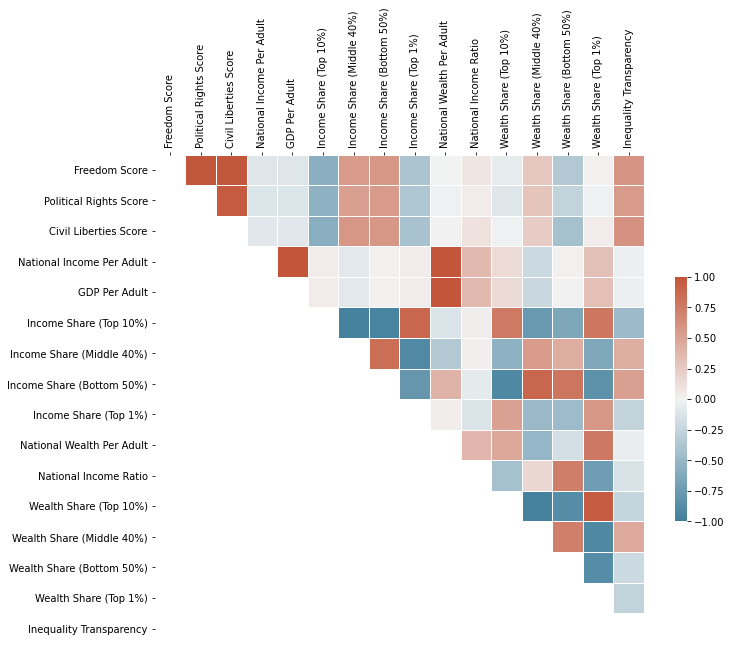

In [11]:
plot_correlation_heatmap(corr)

From the top three rows of the correlation matrix, we can see that the outcome metrics concerning democratic freedoms are all far more similar to each other than they are to any of the economic covariates that will serve as predictors. We can also see how collinear they are with each other from the univariate plots (below). Therefore, there would be little to gain by using separate covariates for political rights and civil liberties and the overall freedom score can be used instead.

In [12]:
model_fits = []
scatter_plot_dict = specify_scatter_plot(df_new, 'Political Rights Score','Freedom Score'); model_fits.append(scatter_plot_dict)
scatter_plot_dict = specify_scatter_plot(df_new, 'Civil Liberties Score','Freedom Score'); model_fits.append(scatter_plot_dict)
scatter_plot_dict = specify_scatter_plot(df_new, 'Political Rights Score','Civil Liberties Score'); model_fits.append(scatter_plot_dict)

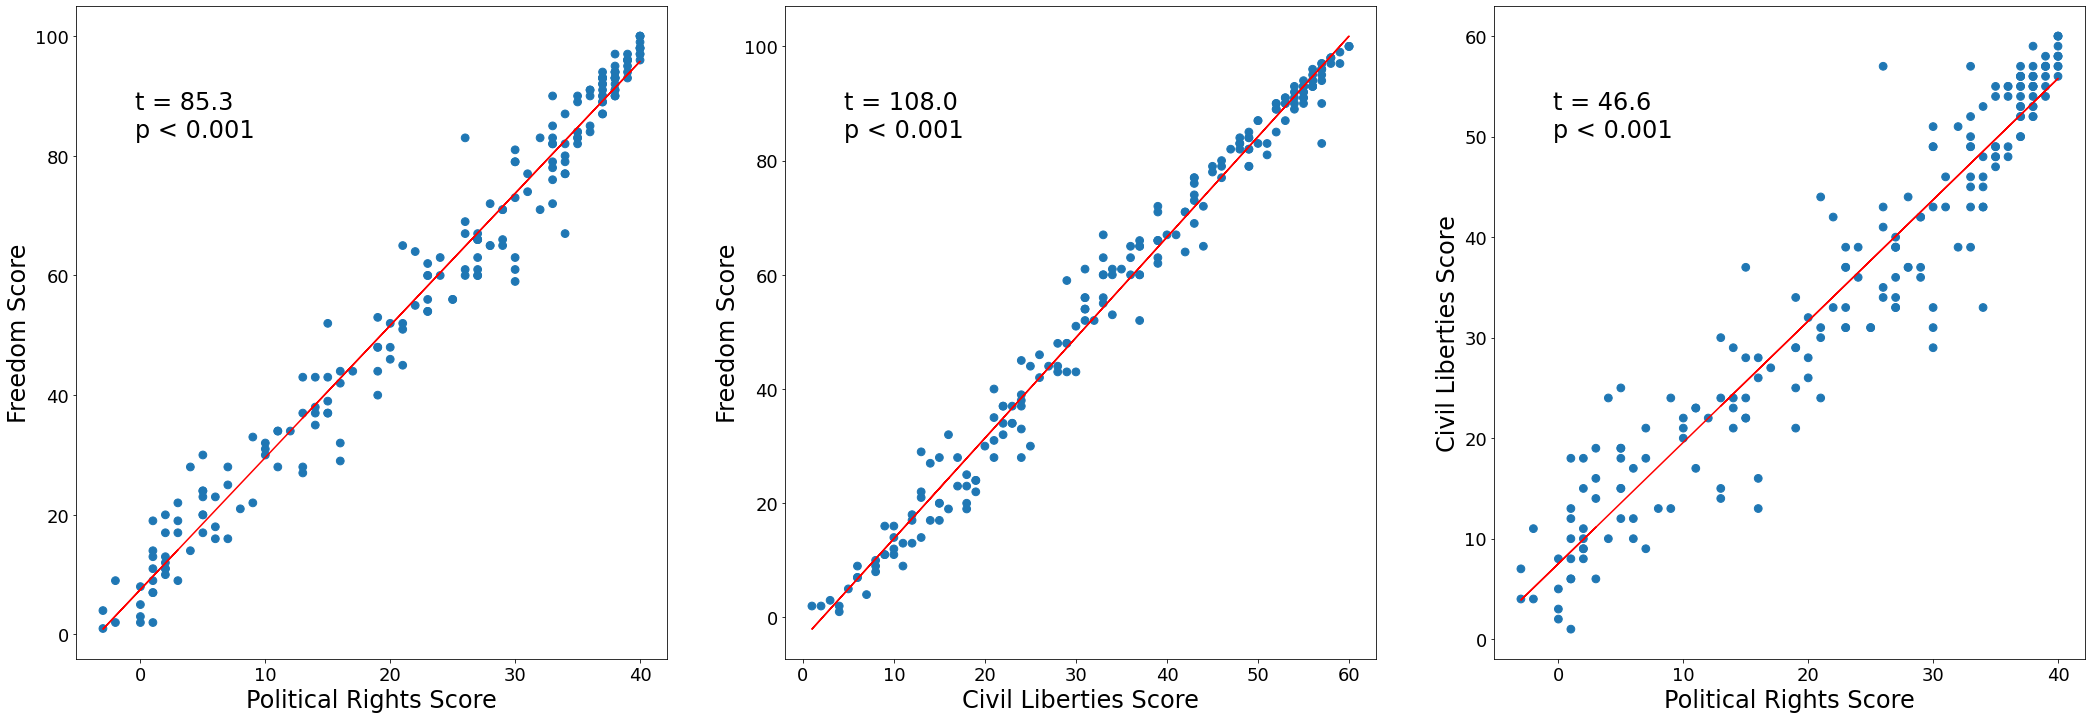

In [13]:
fig, axs = plt.subplots(1, 3, figsize=(36,12))
for c in range(0,3):
    plot_scatter_and_model_fit(model_fits[c], axs[c])

## III.B. Selecting Economic Features

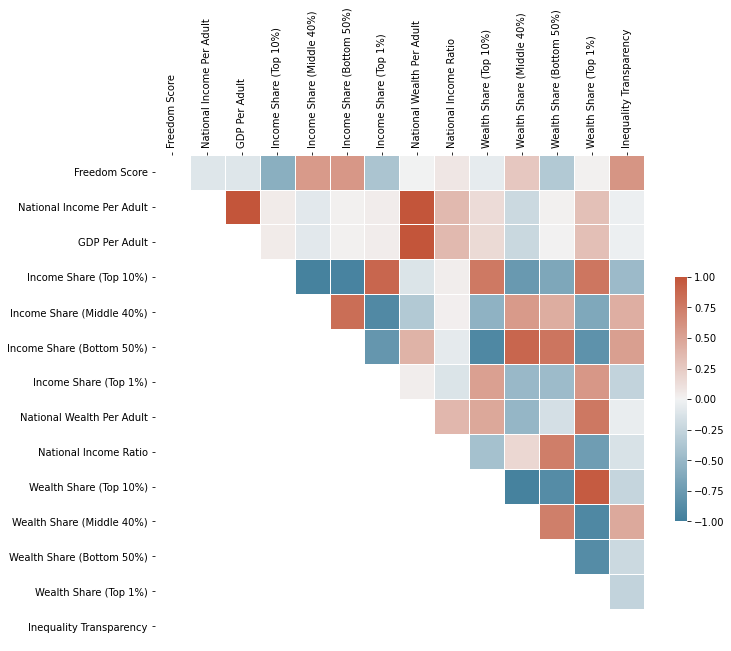

In [14]:
df_new2 = df_new.drop(columns=['Political Rights Score','Civil Liberties Score'])
corr2 = df_new2.corr()
plot_correlation_heatmap(corr2)

As we model the relationship between the economic data we have and the Freedom Score, not every column will be equally informative or worth keeping the final model. In addition to the covariance matrix above, we can start by taking a look at scatter plots of the univariate relationships between each covariate and freedom.

In [15]:
model_fits = []
scatter_plot_dict = specify_scatter_plot(df_new2, 'National Income Per Adult','Freedom Score'); model_fits.append(scatter_plot_dict)
scatter_plot_dict = specify_scatter_plot(df_new2, 'GDP Per Adult','Freedom Score'); model_fits.append(scatter_plot_dict)
scatter_plot_dict = specify_scatter_plot(df_new2, 'Income Share (Top 10%)','Freedom Score');scatter_plot_dict['str_loc_x'] = .1;scatter_plot_dict['str_loc_y'] = .1;model_fits.append(scatter_plot_dict);
scatter_plot_dict = specify_scatter_plot(df_new2, 'Income Share (Middle 40%)','Freedom Score'); model_fits.append(scatter_plot_dict)
scatter_plot_dict = specify_scatter_plot(df_new2, 'Income Share (Bottom 50%)','Freedom Score');scatter_plot_dict['str_loc_x']=.7;scatter_plot_dict['str_loc_y']=.1;model_fits.append(scatter_plot_dict);
scatter_plot_dict = specify_scatter_plot(df_new2, 'Income Share (Top 1%)','Freedom Score');scatter_plot_dict['str_loc_x'] = .7;scatter_plot_dict['str_loc_y'] = .1;model_fits.append(scatter_plot_dict);
scatter_plot_dict = specify_scatter_plot(df_new2, 'National Wealth Per Adult','Freedom Score');scatter_plot_dict['str_loc_x'] = .7;scatter_plot_dict['str_loc_y'] = .1;model_fits.append(scatter_plot_dict);
scatter_plot_dict = specify_scatter_plot(df_new2, 'National Income Ratio','Freedom Score');scatter_plot_dict['str_loc_x'] = .7;scatter_plot_dict['str_loc_y'] = .1;model_fits.append(scatter_plot_dict);
scatter_plot_dict = specify_scatter_plot(df_new2, 'Wealth Share (Top 10%)','Freedom Score'); model_fits.append(scatter_plot_dict)
scatter_plot_dict = specify_scatter_plot(df_new2, 'Wealth Share (Middle 40%)','Freedom Score'); model_fits.append(scatter_plot_dict)
scatter_plot_dict = specify_scatter_plot(df_new2, 'Wealth Share (Bottom 50%)','Freedom Score'); model_fits.append(scatter_plot_dict)
scatter_plot_dict = specify_scatter_plot(df_new2, 'Wealth Share (Top 1%)','Freedom Score'); model_fits.append(scatter_plot_dict)
scatter_plot_dict = specify_scatter_plot(df_new2, 'Inequality Transparency','Freedom Score');scatter_plot_dict['str_loc_x'] = .7;scatter_plot_dict['str_loc_y'] = .1;model_fits.append(scatter_plot_dict);

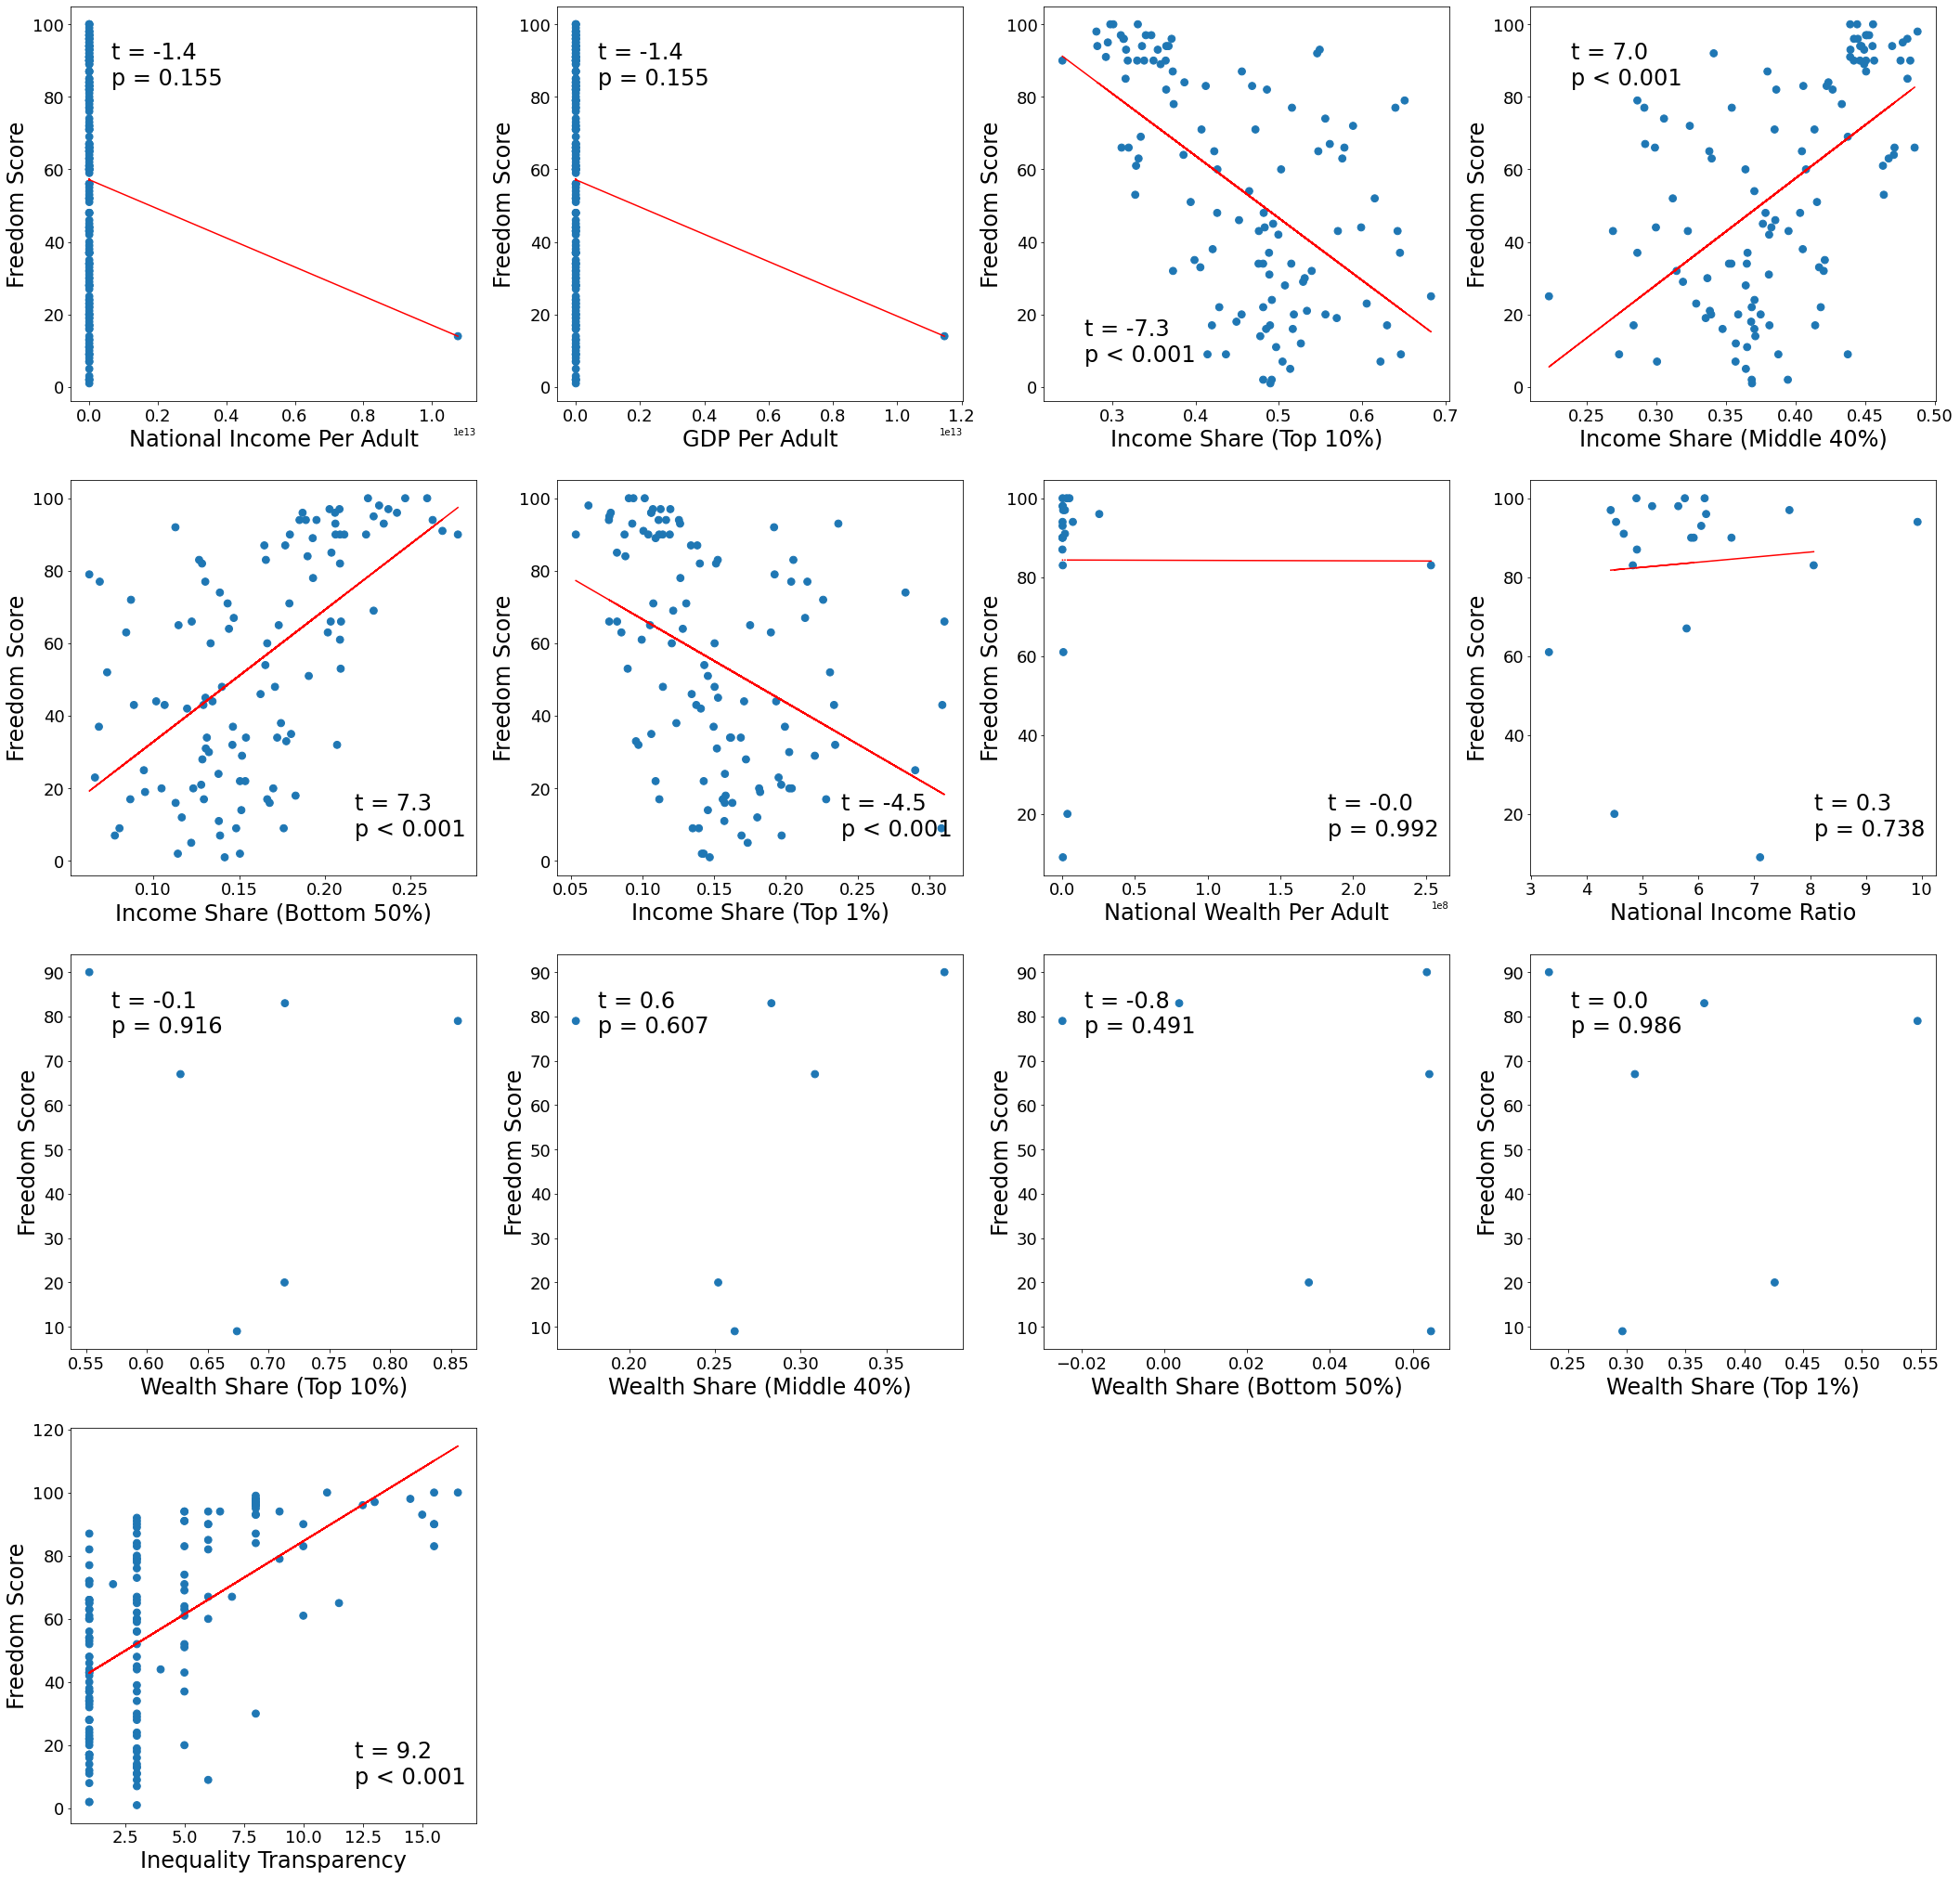

In [16]:
fig, axs = plt.subplots(4, 4, figsize=(36,36))

i = 0
for r in range(0,4):
    for c in range(0,4):
        i = i + 1
        if not i > 13:
            plot_scatter_and_model_fit(model_fits[4*r+c], axs[r,c])
            
fig.delaxes(axs[3][1])
fig.delaxes(axs[3][2])
fig.delaxes(axs[3][3])

### Dealing with Outliers

Looking at the univariate plots, we can see that three of the covariates have extreme outliers that impair the model fits. So let's take the logarithm of National Income Per Adult, GDP Per Adult, and National Wealth Per Adult.

In [17]:
df3 = df_new2.copy()
df3['Log(National Income Per Adult)'] = np.log(df_new2['National Income Per Adult'])
df3['Log(GDP Per Adult)'] = np.log(df_new2['GDP Per Adult'])
df3['Log(National Wealth Per Adult)'] = np.log(df_new2['National Wealth Per Adult'])
df3.drop(columns=['National Income Per Adult','GDP Per Adult', 'National Wealth Per Adult'], inplace = True)

# Reorder Columns
df3_new = df3[['Country Name',
              'Country Code',
              'Freedom Score',
              'Log(National Income Per Adult)',
              'Log(GDP Per Adult)',
              'Income Share (Top 10%)',
              'Income Share (Middle 40%)',
              'Income Share (Bottom 50%)',
              'Income Share (Top 1%)',
              'Log(National Wealth Per Adult)',
              'National Income Ratio',
              'Wealth Share (Top 10%)',
              'Wealth Share (Middle 40%)',
              'Wealth Share (Bottom 50%)',
              'Wealth Share (Top 1%)',
              'Inequality Transparency']]
df3_new.reset_index(inplace = True, drop = True)

corr3 = df3_new.corr()
# plot_correlation_heatmap(corr3)

In [18]:
model_fits = []
scatter_plot_dict = specify_scatter_plot(df3_new, 'Log(National Income Per Adult)','Freedom Score');scatter_plot_dict['str_loc_x'] = .7;scatter_plot_dict['str_loc_y'] = .8;model_fits.append(scatter_plot_dict);
scatter_plot_dict = specify_scatter_plot(df3_new, 'Log(GDP Per Adult)','Freedom Score');scatter_plot_dict['str_loc_x'] = .7;scatter_plot_dict['str_loc_y'] = .8;model_fits.append(scatter_plot_dict);
scatter_plot_dict = specify_scatter_plot(df3_new, 'Income Share (Top 10%)','Freedom Score');scatter_plot_dict['str_loc_x'] = .1;scatter_plot_dict['str_loc_y'] = .1;model_fits.append(scatter_plot_dict);
scatter_plot_dict = specify_scatter_plot(df3_new, 'Income Share (Middle 40%)','Freedom Score'); model_fits.append(scatter_plot_dict)
scatter_plot_dict = specify_scatter_plot(df3_new, 'Income Share (Bottom 50%)','Freedom Score');scatter_plot_dict['str_loc_x'] = .7;scatter_plot_dict['str_loc_y'] = .1;model_fits.append(scatter_plot_dict);
scatter_plot_dict = specify_scatter_plot(df3_new, 'Income Share (Top 1%)','Freedom Score');scatter_plot_dict['str_loc_x'] = .7;scatter_plot_dict['str_loc_y'] = .1;model_fits.append(scatter_plot_dict);
scatter_plot_dict = specify_scatter_plot(df3_new, 'Log(National Wealth Per Adult)','Freedom Score');scatter_plot_dict['str_loc_x'] = .7;scatter_plot_dict['str_loc_y'] = .1;model_fits.append(scatter_plot_dict);
scatter_plot_dict = specify_scatter_plot(df3_new, 'National Income Ratio','Freedom Score');scatter_plot_dict['str_loc_x'] = .7;scatter_plot_dict['str_loc_y'] = .1;model_fits.append(scatter_plot_dict);
scatter_plot_dict = specify_scatter_plot(df3_new, 'Wealth Share (Top 10%)','Freedom Score'); model_fits.append(scatter_plot_dict)
scatter_plot_dict = specify_scatter_plot(df3_new, 'Wealth Share (Middle 40%)','Freedom Score'); model_fits.append(scatter_plot_dict)
scatter_plot_dict = specify_scatter_plot(df3_new, 'Wealth Share (Bottom 50%)','Freedom Score'); model_fits.append(scatter_plot_dict)
scatter_plot_dict = specify_scatter_plot(df3_new, 'Wealth Share (Top 1%)','Freedom Score'); model_fits.append(scatter_plot_dict)
scatter_plot_dict = specify_scatter_plot(df3_new, 'Inequality Transparency','Freedom Score');scatter_plot_dict['str_loc_x'] = .7;scatter_plot_dict['str_loc_y'] = .1;model_fits.append(scatter_plot_dict);

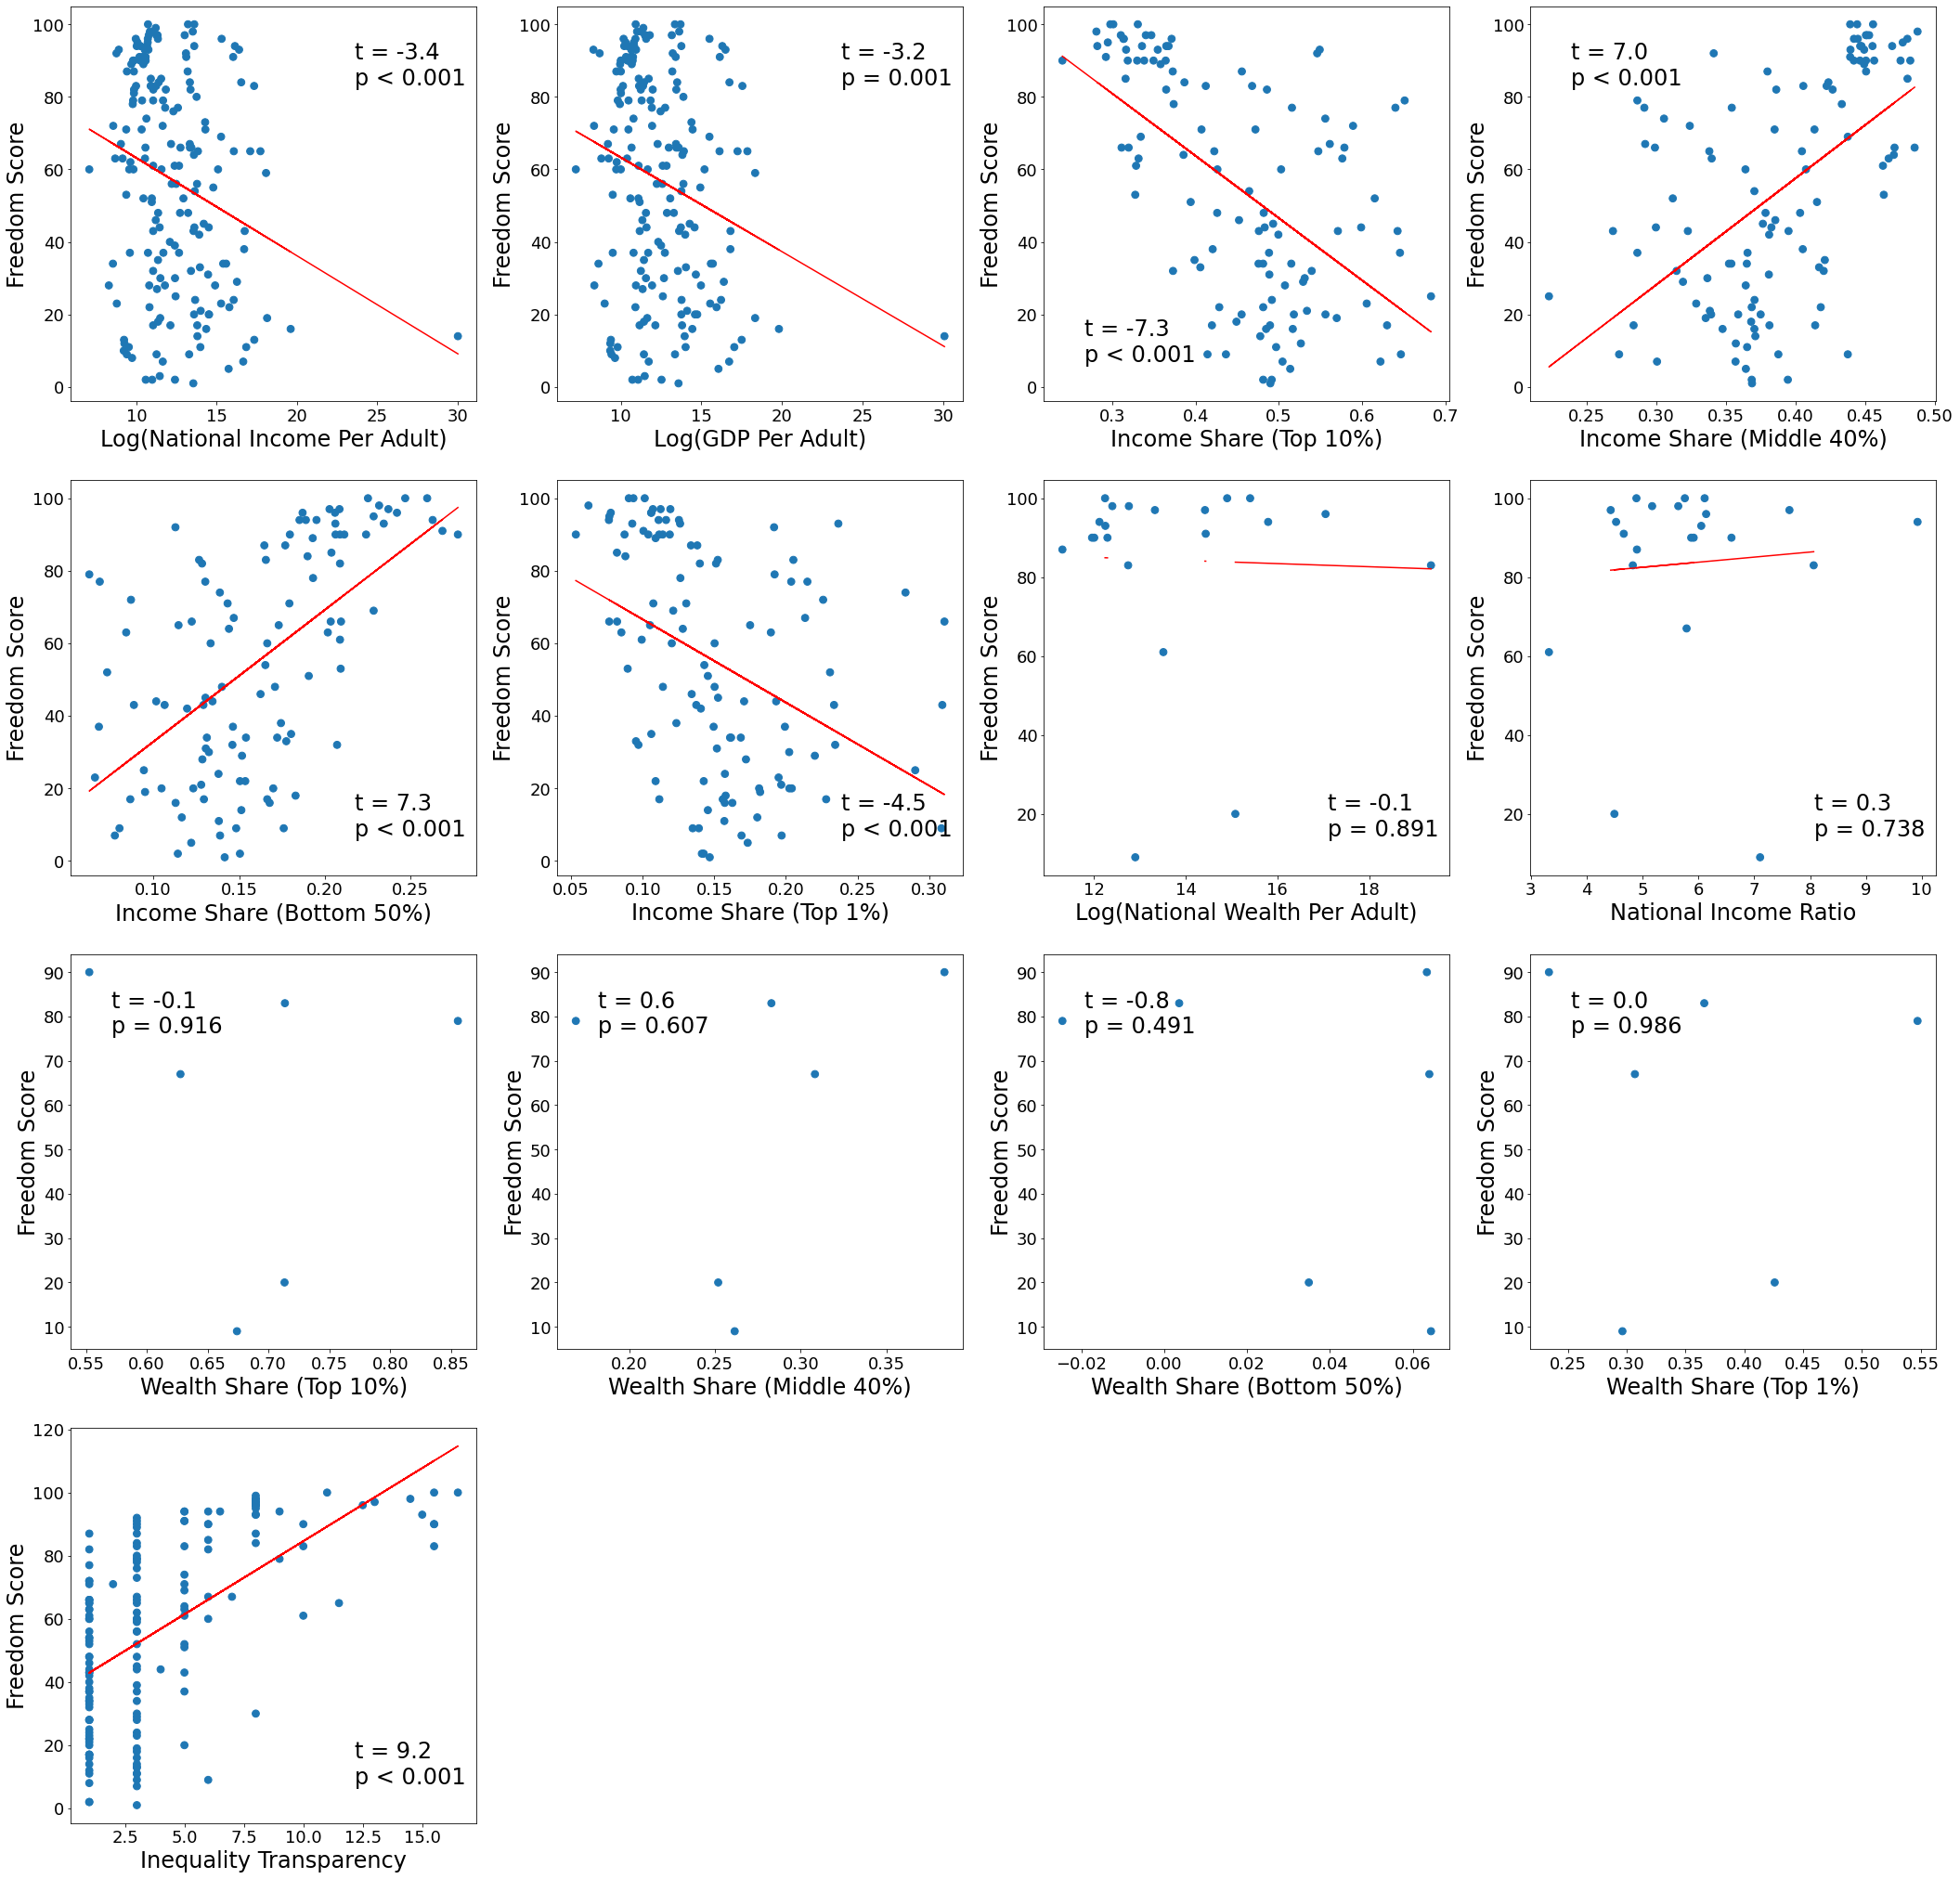

In [19]:
fig, axs = plt.subplots(4, 4, figsize=(36,36))

i = 0
for r in range(0,4):
    for c in range(0,4):
        i = i + 1
        if not i > 13:
            plot_scatter_and_model_fit(model_fits[4*r+c], axs[r,c])
            
fig.delaxes(axs[3][1])
fig.delaxes(axs[3][2])
fig.delaxes(axs[3][3])

### Dealing with Missing Data

The next thing to account for is all of the missing data. Most countries are simply not as transparent with their data&mdash;particularly their wealth data&mdash;as the WID researchers would like them to be. And there are therefore a lot of missing data among the key indicators selected by the WID.

Let's take a look at how much data is missing for each economic covariate.

In [20]:
econ_df = df3_new.drop(columns=['Country Name','Country Code', 'Freedom Score'])
missing_data_df = make_missing_data_df(econ_df)
missing_data_df

,Covariate,Data Present,Data Present %
0,Log(National Income Per Adult),185,93.434343
1,Log(GDP Per Adult),185,93.434343
2,Income Share (Top 10%),112,56.565657
3,Income Share (Middle 40%),111,56.060606
4,Income Share (Bottom 50%),111,56.060606
5,Income Share (Top 1%),112,56.565657
6,Log(National Wealth Per Adult),21,10.606061
7,National Income Ratio,22,11.111111
8,Wealth Share (Top 10%),6,3.030303
9,Wealth Share (Middle 40%),6,3.030303


The biggest issue right off the bat is that only 6 countries actually have data for wealth share distributions. Which means that any information they provide isn't going to generalize globally. And from their univariate regression plots, we can be confident that they won't add much to the model, so we can safely drop them. Similarly, the measures of National Wealth Per Adult and National Income Ratio only have data from about 11% of the countries and don't have good model fits. So let's drop those too. 

### Dealing with Collinearity

Now that we have a more limited group of potential model covariates, let's address the collinearity between them.

In [21]:
df4 = df3_new.drop(columns=['Wealth Share (Top 10%)','Wealth Share (Middle 40%)', 'Wealth Share (Bottom 50%)', 'Wealth Share (Top 1%)','Log(National Wealth Per Adult)','National Income Ratio'])

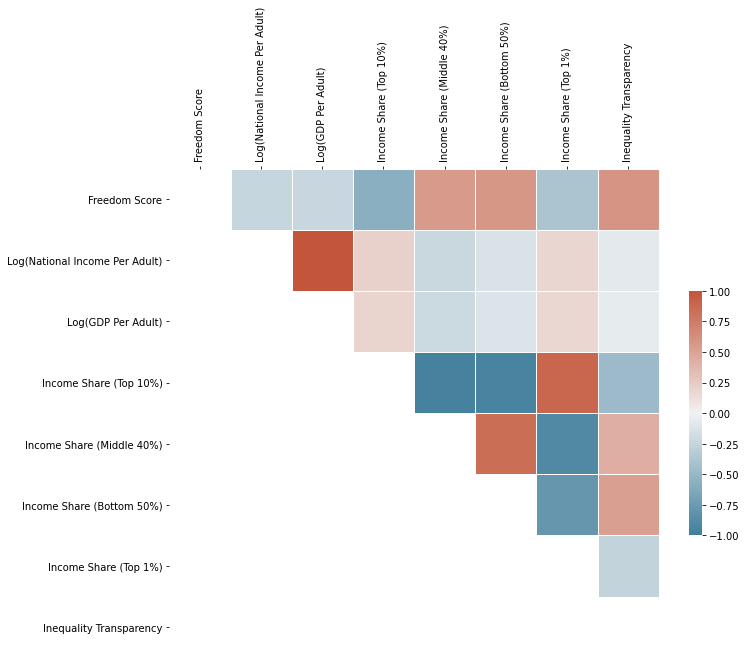

In [22]:
corr4 = df4.corr()
plot_correlation_heatmap(corr4)

We can see that the Income Share measures are all highly correlated with each other. So are National Income and GDP.

Let's take a look at what happens when we create a model that uses all of the Income Share measures.

In [23]:
# Income Shares Model
covariates = pd.concat([df4[['Income Share (Top 10%)']], df4[['Income Share (Middle 40%)']], df4[['Income Share (Bottom 50%)']], df4[['Income Share (Top 1%)']]],axis = 1)
run_model(covariates, df4[['Freedom Score']])

                            OLS Regression Results                            
Dep. Variable:          Freedom Score   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                     16.93
Date:                Thu, 20 May 2021   Prob (F-statistic):           9.17e-11
Time:                        14:29:28   Log-Likelihood:                -511.21
No. Observations:                 111   AIC:                             1032.
Df Residuals:                     106   BIC:                             1046.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

We get an unusable mess. The model even chastises us for having "strong multicollinearity".

We also see unreasonably high coefficients and standard errors for the other group of covariates:

In [24]:
# National Income & GDP Model
covariates = pd.concat([df4[['Log(National Income Per Adult)']], df4[['Log(GDP Per Adult)']]],axis = 1)
run_model(covariates, df4[['Freedom Score']])

                            OLS Regression Results                            
Dep. Variable:          Freedom Score   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     10.29
Date:                Thu, 20 May 2021   Prob (F-statistic):           5.86e-05
Time:                        14:29:28   Log-Likelihood:                -882.44
No. Observations:                 185   AIC:                             1771.
Df Residuals:                     182   BIC:                             1781.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

On the other hand, models that separate National Income and GDP estimate much smaller coefficients and standard errors, while still holding statistical significance.

In [25]:
# National Income Model
covariates = pd.concat([df4[['Log(National Income Per Adult)']]],axis = 1)
# run_model(covariates, df4[['Freedom Score']])

# GDP Model
covariates = pd.concat([df4[['Log(GDP Per Adult)']]],axis = 1)
# run_model(covariates, df4[['Freedom Score']])

So let's keep the Income Share (Top 10%) and the National Income Per Adult covariates and remove the rest.

In [26]:
df5 = df4.drop(columns=['Income Share (Middle 40%)', 'Income Share (Bottom 50%)', 'Income Share (Top 1%)', 'Log(GDP Per Adult)'])

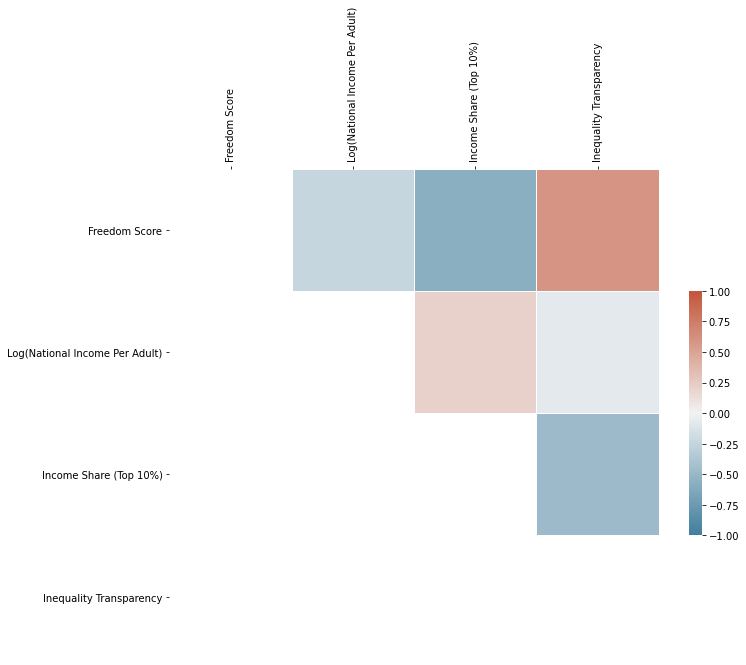

In [27]:
corr5 = df5.corr()
plot_correlation_heatmap(corr5)

In [28]:
covariates = pd.concat([df5[['Log(National Income Per Adult)']],df5[['Income Share (Top 10%)']],df5[['Inequality Transparency']]],axis = 1)
run_model(covariates, df5[['Freedom Score']])

                            OLS Regression Results                            
Dep. Variable:          Freedom Score   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                     33.11
Date:                Thu, 20 May 2021   Prob (F-statistic):           7.29e-15
Time:                        14:29:28   Log-Likelihood:                -456.42
No. Observations:                 102   AIC:                             920.8
Df Residuals:                      98   BIC:                             931.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

### Dealing with Data Leakage

We now have a model capable of explaining about half of the variance (R<sup>2</sup>) present in the distribution of democratic freedom scores.

It is worth, however, taking a look back at the Inequality Transparency covariate. While it is significantly associated with the Democratic Freedom Score, that's not very surprising. How transparent a country is with its economic data is really more of a democratic metric than an economic one. So it is then not ultimately appropriate to include it as a predictor.

Therefore, the final model will only include the logarithm of National Income Per Adult and the Income Share of the Top 10%.

## III.C. Final Model

In [29]:
covariates = pd.concat([df5[['Log(National Income Per Adult)']],df5[['Income Share (Top 10%)']]],axis = 1)
run_model(covariates, df5[['Freedom Score']])

                            OLS Regression Results                            
Dep. Variable:          Freedom Score   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     30.52
Date:                Thu, 20 May 2021   Prob (F-statistic):           2.99e-11
Time:                        14:29:28   Log-Likelihood:                -518.84
No. Observations:                 112   AIC:                             1044.
Df Residuals:                     109   BIC:                             1052.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

This final model expains about 36% of the variance (R<sup>2</sup>). For reference, the univariate Income Share model expains about 33% by itself, while the univariate National Income model only explains about 6%.

In [30]:
# Univariate Income Share Model
covariates = pd.concat([df5[['Income Share (Top 10%)']]],axis = 1)
# run_model(covariates, df5[['Freedom Score']])

# Univariate National Income Model
covariates = pd.concat([df5[['Log(National Income Per Adult)']]],axis = 1)
# run_model(covariates, df5[['Freedom Score']])

# IV. Discussion

A statistically singnificant negative correlation was found between income inequality and democratic freedom around the world. This provides a good gut-check for the progressive consensus that economic inequality is a negative force in the world. Indeed, it is.

This analysis would be stronger still if more data on global wealth inequality (and not just income inequality) were available. However, the primary limitation of this work is that economic inequality is fundamentally not a technical problem. In fact, the technical solution is relatively straightforward as economist Thomas Piketty identifies in his seminal monograph [Capital in the 21st Century](https://www.hup.harvard.edu/catalog.php?isbn=9780674430006): a national (ideally global) progressive wealth tax.

The primary barrier to implementing a wealth tax is generating the political will to pass one. Wealth taxes implemented in Europe have proven ineffective because the [wealthiest individuals were free to relocate to other EU nations without wealth taxes](https://www.npr.org/sections/money/2019/02/26/698057356/if-a-wealth-tax-is-such-a-good-idea-why-did-europe-kill-theirs). Piketty suggests that in order to hold regulatory power over a large enough share of the global economy, any European wealth tax must be implemented at the EU level rather than the national level. He posits that larger economies (namely the US and China) could, however, effectively levy a national wealth tax. While a wealth tax in the United States may not currently be at the top of the poltical agenda (with a [global pandemic](https://www.nytimes.com/news-event/coronavirus) and a [crisis of democracy](https://www.vox.com/policy-and-politics/2021/1/6/22217657/us-capitol-breach-trump-rally-presidential-election) to deal with), Senator Elizabeth Warren&mdash;[who has had a way of both predicting and driving the course of the economic debates of the past 20 years](https://www.nytimes.com/2021/05/07/podcasts/ezra-klein-podcast-elizabeth-warren-transcript.html)&mdash;has been vigorously promoting a wealth tax, both in her [2020 Democratic primary bid](https://elizabethwarren.com/wealth-gap) and [since](https://www.nytimes.com/2021/03/01/business/elizabeth-warren-wealth-tax.html). China, on the other hand, given its [authoritarian one-party rule](https://www.nytimes.com/2021/03/04/world/asia/china-economy.html), is unlikely to do anything to internally redistribute either wealth or power.

For a more comprehensive look at the intersections of macroeconomics and geopolitics, I will next be reading Thomas Piketty's follow up to Capital in the 21st Century: [Capital and Ideology](https://www.hup.harvard.edu/catalog.php?isbn=9780674980822).